In [1]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [2]:
X, y = make_blobs(cluster_std=2.0, centers = 2, random_state=42)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

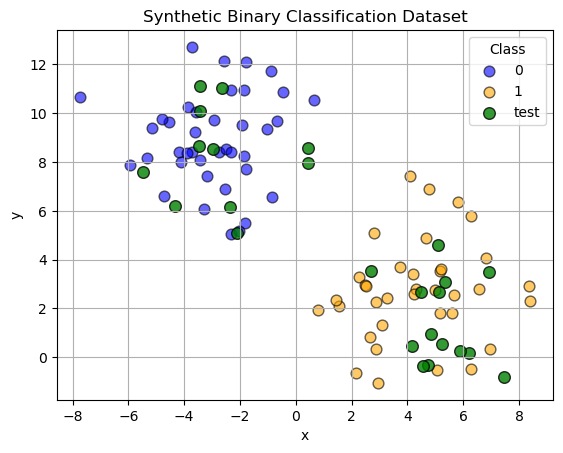

In [4]:
fig, ax = plt.subplots()
for label, color in enumerate(['blue', 'orange']):
    ax.scatter(X_train[y_train == label][:, 0], X_train[y_train == label][:, 1], c=color, label=label,
               alpha=0.6, edgecolors='black', s = 60)
ax.scatter(X_test[:, 0], X_test[:, 1], c='green', label='test',
               alpha=0.8, edgecolors='black', s = 70)
    
ax.legend(title = 'Class')
ax.set_title('Synthetic Binary Classification Dataset')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)

In [5]:
svc_1 = SVC(kernel = 'linear').fit(X_train, y_train)
support_vectors = svc_1.support_vectors_

support_vectors

array([[-0.8641078 ,  6.57259883],
       [ 0.80233641,  1.92014193],
       [ 4.11056517,  7.41350802]])

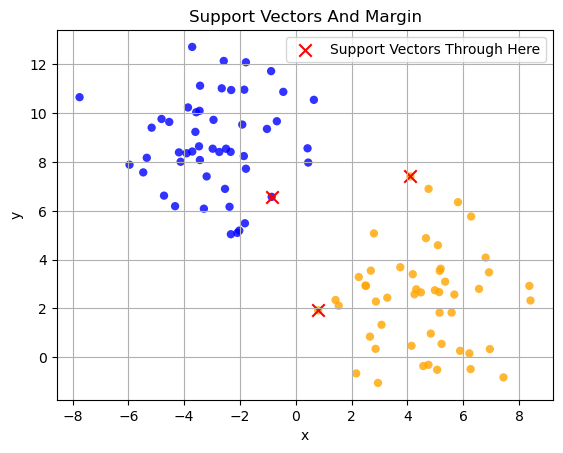

In [6]:
fig, ax = plt.subplots()
for label, color in enumerate(['blue', 'orange']):
    ax.scatter(X[y == label][:, 0], X[y == label][:, 1], c=color, 
               alpha=0.8, edgecolors='none')
ax.set_title('Support Vectors And Margin')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.scatter(support_vectors[:, 0], support_vectors[:, 1], color = 'red', s = 80, marker = 'x', label = 'Support Vectors Through Here')
ax.grid(True)
ax.legend()

In [7]:
slope2 = (support_vectors[1, 1] - support_vectors[2, 1])/(support_vectors[1, 0] - support_vectors[2, 0]) 


def lower(x):
    return slope2*(x - support_vectors[2, 0]) + support_vectors[2, 1]
def upper(x):
    return slope2*(x - support_vectors[0, 0]) + support_vectors[0, 1]

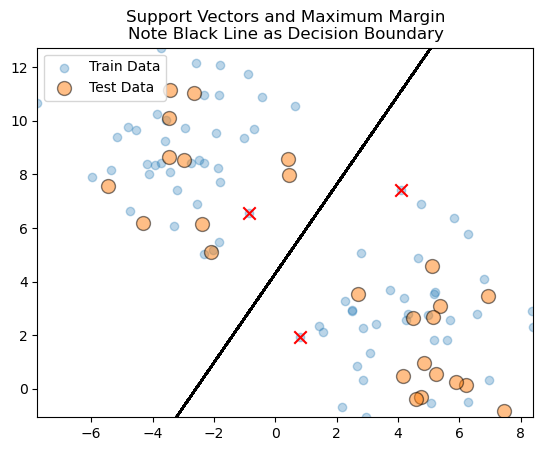

In [8]:
#Grid of points to plot decision boundaries 
XX, YY = np.meshgrid(X_train[:, 0], X_train[:, 1])
xy = np.vstack([XX.ravel(), YY.ravel()]).T
#Output from grid of points based on decision function
Z = svc_1.decision_function(xy).reshape(XX.shape)
#Plots of points and support vectors
fig, ax = plt.subplots()
ax.contour(XX, YY,  Z, levels = [0], colors = ['black'])
ax.scatter(X_train[:, 0], X_train[:, 1], alpha = 0.3, label = 'Train Data')
ax.scatter(X_test[:, 0], X_test[:, 1], s = 100, alpha = 0.5, edgecolor = 'black', label = 'Test Data')
ax.scatter(support_vectors[:, 0], support_vectors[:, 1], color = 'red', s = 80, marker = 'x')
ax.legend(loc = 'upper left')
ax.set_title('Support Vectors and Maximum Margin\nNote Black Line as Decision Boundary');

Text(0.5, 1.0, 'Logistic Regression (red) vs. Linear SVC (black)')

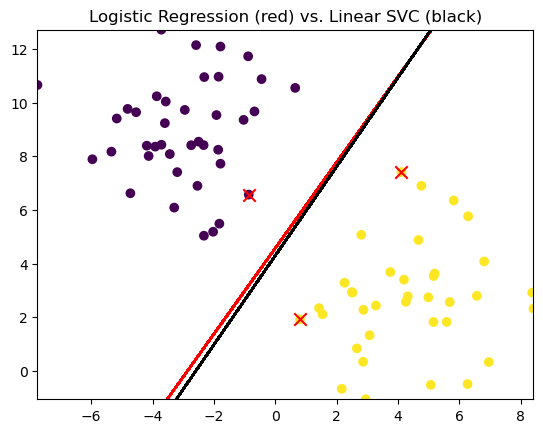

In [9]:
lgr = LogisticRegression().fit(X_train, y_train)
Z2 = lgr.decision_function(xy).reshape(XX.shape)
plt.contour(XX, YY,  Z2, levels = [0], colors = ['red'])
plt.contour(XX, YY,  Z, levels = [0], colors = ['black'])
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color = 'red', s = 80, marker = 'x')
plt.title('Logistic Regression (red) vs. Linear SVC (black)')

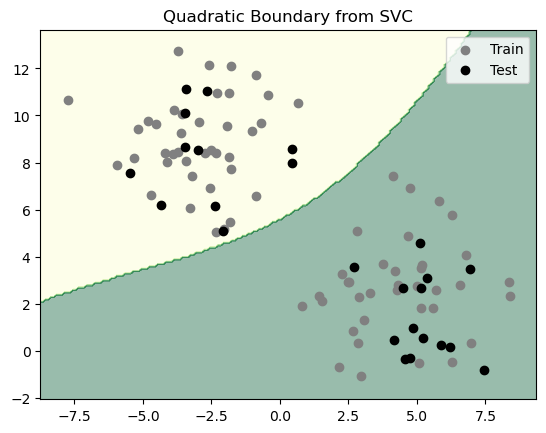

In [10]:
svc2 = SVC(kernel='poly').fit(X_train, y_train)
h = 0.1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z3 = svc2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy,  Z3, cmap = 'YlGn', alpha = 0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c = 'grey', label = 'Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c = 'black', label = 'Test')
plt.legend()
plt.title('Quadratic Boundary from SVC');